In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kumarvishal88/ml-assignment-1-datasets

In [ ]:
! unzip ml-assignment-1-datasets

In [ ]:
! unzip Mangal.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
import random as rand
import csv
import librosa

In [ ]:
pip install Pillow

In [ ]:
# Image Data Pre-processing

import cv2

for subdir in os.listdir("/content/IMAGE_DATA/IMAGE_DATA"):
  subdir_path = "/content/IMAGE_DATA/IMAGE_DATA/" + subdir
  for images in os.listdir(subdir_path):
    img_path = subdir_path + "/" + images


In [ ]:
# Image Data Q1
mydict = {}

for (root, dirs, files) in os.walk('IMAGE_DATA', topdown = False):
  if len(files) > 0:
    classname = os.path.basename(root)
    mydict[classname] = len(files)

print(mydict)

names = list(mydict.keys())
values = list(mydict.values())

plt.bar(range(len(mydict)), values, tick_label = names)
plt.show()

print("The imbalanced class is ELEPHANTS")

# Methods to Balance a Dataset:
# There are several methods to balance a dataset containing images:
# Random Undersampling: This involves randomly removing samples from the majority class until it matches the size of the minority class. However, this can result in loss of important information.
# Random Oversampling: This involves randomly duplicating samples from the minority class until it matches the size of the majority class. However, this can lead to overfitting.
# Synthetic Data Generation: Creating new synthetic samples for the minority class can be done through techniques like SMOTE (Synthetic Minority Over-sampling Technique), which generates new examples by interpolating between existing ones.
# Data Augmentation: This involves applying various transformations (rotations, flips, zooms, etc.) to existing samples to create new variations. This can help increase the effective size of the dataset for training.
# Weighted Loss Functions: During model training, you can assign higher weights to the loss function for underrepresented classes. This way, the model pays more attention to those classes during training.
# Transfer Learning: If you have access to a pre-trained model, you can use transfer learning to leverage the knowledge from a model trained on a larger, more balanced dataset.


In [ ]:
# Image Data Q2
data = []
nums = []
nums1 = []
for x, y in mydict.items():
  data.append(x)
  nums.append(y)
  nums1.append(0)

for i in range(8):
  while True:
    ran_num = rand.randint(0, 4)
    if nums[ran_num] <= 0:
      continue
    else:
      nums1[ran_num] = nums1[ran_num] + 1
      nums[ran_num] = nums[ran_num] - 1
      break

dict1 = {}
for i in range(len(nums1)):
  dict1[data[i]] = nums1[i]

img_path = []
for subdir in os.listdir("/content/IMAGE_DATA/IMAGE_DATA"):
  req = dict1[subdir]
  subdir_path = "/content/IMAGE_DATA/IMAGE_DATA/" + subdir
  ran_lis = list(range(0, req))
  rand.shuffle(ran_lis)
  final_ran_lis = []
  for i in range(dict1[subdir]):
    final_ran_lis.append(ran_lis[i])
  final_ran_lis.sort(reverse = False)
  cnt = 0
  for images in os.listdir(subdir_path):
    if cnt in final_ran_lis:
      img_path.append(os.path.join(subdir_path, images))
    cnt += 1

for i in img_path:
  img = cv2.imread(i, 0)
  plt.hist(img.ravel(), 256, [0, 256])
  plt.title(i)
  plt.show()
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
# Image Data Q3
from PIL import Image
from numpy import asarray

class_mean = {}
class_var = {}
for subdir in os.listdir("/content/IMAGE_DATA/IMAGE_DATA"):
  subdir_path = "/content/IMAGE_DATA/IMAGE_DATA/" + subdir
  img_val = []
  for images in os.listdir(subdir_path):
    img_path = subdir_path + "/" + images

    img = cv2.imread(img_path)
    imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_arr = asarray(imggray)
    val = 0
    for row in img_arr:
      for ele in row:
        val += ele
    img_val.append(val)

  mean = sum(i for i in img_val) / len(img_val)
  class_mean[subdir] = mean

  var = sum((i - mean) ** 2 for i in img_val) / len(img_val)
  class_var[subdir] = var

print("Mean of each class is as follows : ")
for subdir, mean in class_mean.items():
  print("Class = ", subdir, ", Mean = ", mean)
print()
print("Variance of each class is as follows : ")
for subdir, var in class_var.items():
  print("Class = ", subdir, ", Variance = ", var)


In [ ]:
def standardize_image(image):
    image_array = np.array(image)

    mean = np.mean(image_array)
    std = np.std(image_array)

    standardized_image = (image_array - mean) / std

    return standardized_image

In [ ]:
# Image Data Q4
# Take 4 images from RANDOM class in dataset standardize them and plot before and after images,
# write your observation.

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage import exposure

ran_list = list(range(0, mydict["RANDOM"]))
rand.shuffle(ran_list)
final_img_idx = []
for i in range(4):
  final_img_idx.append(ran_list[i])
final_img_idx.sort()
cnt = 0
img_path = []
for image in os.listdir("/content/IMAGE_DATA/IMAGE_DATA/RANDOM"):
  if cnt in final_img_idx:
    img_path.append("/content/IMAGE_DATA/IMAGE_DATA/RANDOM/" + image)
  cnt += 1

print("Images before standardize are as follows ")
for image in img_path:
  img = mpimg.imread(image)
  imgplot = plt.imshow(img)
  plt.title(image)
  plt.show()
  print()

print()
print("Images after standardize are as follows ")
for image in img_path:
  img = io.imread(image)
  standardized_img = standardize_image(img)

  # img_std = mpimg.imread(standardized_img)
  imgplot = plt.imshow(standardized_img)
  plt.title(image)
  plt.show()
  print()



In [ ]:
# Image Data Q5
# Perform transformation on images (random rotation, random croping, random scale) and plot before and after images.


import cv2
import imutils
from PIL import Image

data = []
nums = []
nums1 = []
for x, y in mydict.items():
  data.append(x)
  nums.append(y)
  nums1.append(0)

for i in range(12):
  while True:
    ran_num = rand.randint(0, 4)
    if nums[ran_num] <= 0:
      continue
    else:
      nums1[ran_num] = nums1[ran_num] + 1
      nums[ran_num] = nums[ran_num] - 1
      break

dict1 = {}
for i in range(len(nums1)):
  dict1[data[i]] = nums1[i]

img_path = []
for subdir in os.listdir("/content/IMAGE_DATA/IMAGE_DATA"):
  req = dict1[subdir]
  subdir_path = "/content/IMAGE_DATA/IMAGE_DATA/" + subdir
  ran_lis = list(range(0, req))
  rand.shuffle(ran_lis)
  final_ran_lis = []
  for i in range(dict1[subdir]):
    final_ran_lis.append(ran_lis[i])
  final_ran_lis.sort(reverse = False)
  cnt = 0
  for images in os.listdir(subdir_path):
    if cnt in final_ran_lis:
      img_path.append(os.path.join(subdir_path, images))
    cnt += 1

for image in img_path:
  print(image)
  print("Plot of the image before transformations ")
  img = mpimg.imread(image)
  imgplot = plt.imshow(img)
  plt.title(image)
  plt.show()
  print()

#   Random Rotation
  # ran_list = list(range(0, 360))
  # rand.shuffle(ran_list)
  # random_degree = ran_list[0]
  # img = cv2.imread(image)
  # img = imutils.rotate(img, angle=45)

#   Random Croping

#   Ramdom Scale



  plt.imshow(img)
  plt.show()
  print()


In [ ]:
#                                                                                 TEXT DATA

In [ ]:
# Text Data : Preprecessing
import csv
english_arr = []
hindi_arr = []
l = 0
with open('/content/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv', 'r') as csv_file:
  csv_reader = csv.reader(csv_file)
  for line in csv_reader:
    english_arr.append(line[1])
    hindi_arr.append(line[2])
    l = l + 1
# print(len(english_arr))



In [ ]:
# Text Data Q1
# Find average text length of English and Hindi corpus (including whitespace, punctuations etc.)

english_length = 0
hindi_length = 0

for i in range(len(english_arr)):
  english_length = english_length + len(english_arr[i])
  hindi_length = hindi_length + len(hindi_arr[i])

avg_english_len = english_length / l
avg_hindi_len = hindi_length / l

print("The average length of english text is : ", avg_english_len)
print("The average length of hindi text is : ", avg_hindi_len)

In [ ]:
def str_without_punc_and_spec_char(st):
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for ele in st:
    if ele in punc:
      st = st.replace(ele, "")
  bad_chars = [';', ':', '!', "*", " "]
  st = ''.join(i for i in st if not i in bad_chars)
  return st

In [ ]:
# Text Data Q2
# Randomly select 20 parallel texts and remove puctuations and special characters.

ran_lis = list(range(0, l))
rand.shuffle(ran_lis)
final_ran_list = []
for i in range(20):
  final_ran_list.append(ran_lis[i])
before_str_eng = []
before_str_hin = []
for i in range(20):
  before_str_eng.append(english_arr[final_ran_list[i]])
  before_str_hin.append(hindi_arr[final_ran_list[i]])
after_str_eng = []
after_str_hin = []
for i in range(20):
  after_str_eng.append(str_without_punc_and_spec_char(before_str_eng[i]))
  after_str_hin.append(str_without_punc_and_spec_char(before_str_hin[i]))

print(*before_str_eng)
print(*after_str_eng)

print(*before_str_hin)
print(*after_str_hin)



In [ ]:
import re
def extract_words_from_string(input_string):
  res = re.findall(r'\w+', input_string)
  return res


In [ ]:
# Text Data Q3
# ⟩ Randomly select 50 parallel texts and make dictionary for both english and hindi corpus. (Here
# dictionary means a key-value mapping where key is word and value is a unique number, no two keys can have
# same number)

ran_lis = list(range(0, l - 1))
rand.shuffle(ran_lis)
final_ran_list = []
for i in range(50):
  final_ran_list.append(ran_lis[i])

li = extract_words_from_string("I am prem kamal jain")
eng_str_lis1 = []
hin_str_lis1 = []
for i in range(50):
  eng_str_lis1.append(english_arr[final_ran_list[i]])
  hin_str_lis1.append(hindi_arr[final_ran_list[i]])
eng_dict = {}
hin_dict = {}
for i in range(50):
  eng_word_list = extract_words_from_string(eng_str_lis1[i])
  hin_word_list = extract_words_from_string(hin_str_lis1[i])

  for words in eng_word_list:
    if words not in eng_dict.keys():
      eng_dict[words] = 1
    else:
      eng_dict[words] = eng_dict[words] + 1
  for words in hin_word_list:
    if words not in hin_dict.keys():
      hin_dict[words] = 1
    else:
      hin_dict[words] = hin_dict[words] + 1

print("English data set dictionary is as follows : ")
for words, freq in eng_dict.items():
  print("Word = ", words, ", Frequency = ", freq)
print()
print("Hindi data set dictionary is as follows : ")
for words, freq in hin_dict.items():
  print("Word = ", words, ", Frequency = ", freq)

# names = list(eng_dict.keys())
# values = list(eng_dict.values())

# plt.bar(range(len(eng_dict)), values, tick_label = names)
# plt.show()

# names = list(hin_dict.keys())
# values = list(hin_dict.values())

# plt.bar(range(len(hin_dict)), values, tick_label = names)
# plt.show()

# sorted_all_dict = sorted(all_dict.items(), key = lambda x : x[1])

In [ ]:
# Text Data Q4
# Find 10 most occuring words and plot there histogram with labels.

all_eng_dict = {}
all_hin_dict = {}
for strs in english_arr:
  eng1 = extract_words_from_string(strs)
  for words in eng1:
    if words not in all_eng_dict.keys():
      all_eng_dict[words] = 1
    else :
      all_eng_dict[words] += 1
for strs in hindi_arr:
  hin1 = extract_words_from_string(strs)
  for words in hin1:
    if words not in all_hin_dict.keys():
      all_hin_dict[words] = 1
    else:
      all_hin_dict[words] += 1

sorted_eng = sorted(all_eng_dict.items(), key = lambda x : x[1], reverse = True)
sorted_hin = sorted(all_hin_dict.items(), key = lambda x : x[1], reverse = True)

eng10 = {}
cnt = 0
for words, freq in sorted_eng:
  if cnt == 10:
    break
  eng10[words] = freq
  cnt += 1

plt.bar(range(len(eng10)), list(eng10.values()), tick_label = list(eng10.keys()))
plt.title("English top 10 words vs frequency")
plt.show()

hin10 = {}
cnt = 0
for words, freq in sorted_hin:
  if cnt == 10:
    break
  hin10[words] = freq
  cnt += 1

val_val = []
key_val = []
cnt = 1
for word, freq in hin10.items():
  print("The word ", word, " is represented as ", cnt)
  val_val.append(cnt)
  key_val.append(freq)
  cnt += 1

plt.bar(range(len(hin10)), key_val, tick_label = val_val)
plt.title("Hindi top 10 words vs frequency")
plt.show()

In [ ]:
#                                                                          AUDIO DATA

In [ ]:
import librosa
def get_duration(file_path):
   audio_data, sample_rate = librosa.load(file_path)
   duration = librosa.get_duration(y=audio_data, sr=sample_rate)
   return duration

In [ ]:
# Audio Data Q1
# Find mean audio length of each class and check for imbalance class if any, suggest methods to
# balance the dataset.

audio_len_dict = {}
for (root, dirs, files) in os.walk('AUDIO_DATA', topdown = False):
  aud_len = 0
  classname = os.path.basename(root)
  for aud in files :
    path = root + '/' + aud
    ll = get_duration(path)
    aud_len += ll
  aud_len = aud_len / len(root)
  if classname != 'AUDIO_DATA':
    audio_len_dict[classname] = aud_len

names = list(audio_len_dict.keys())
values = list(audio_len_dict.values())
plt.bar(range(len(audio_len_dict)), values, tick_label = names)
plt.show()

In [ ]:
# Audio Data Q2
# Plot spectrogram of randomly selected 4 audios from complete dataset.

import scipy.io.wavfile as wavfile

Fs, aud = wavfile.read('/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0005.wav')
# aud = aud[:-1]
first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.show()

In [ ]:
# random function implementation

def randlist(xxx):
  mydict = {}
  for (root, dirs, files) in os.walk('AUDIO_DATA', topdown = False):
    if len(files) > 0:
      classname = os.path.basename(root)
      mydict[classname] = len(files)



  img_path = []
  data = []
  nums = []
  nums1 = []

  for x, y in mydict.items():
    data.append(x)
    nums.append(y)
    nums1.append(0)

  for i in range(xxx):
    while True:
      ran_num = rand.randint(0, 4)
      if nums[ran_num] <= 0:
        continue
      else:
        nums1[ran_num] = nums1[ran_num] + 1
        nums[ran_num] = nums[ran_num] - 1
        break
  dict1 = {}
  for i in range(len(nums1)):
    dict1[data[i]] = nums1[i]

  for subdir in os.listdir("/content/AUDIO_DATA/AUDIO_DATA"):
    req = dict1[subdir]
    subdir_path = "/content/AUDIO_DATA/AUDIO_DATA/" + subdir
    ran_lis = list(range(0, req))
    rand.shuffle(ran_lis)
    final_ran_lis = []
    for i in range(dict1[subdir]):
      final_ran_lis.append(ran_lis[i])
    final_ran_lis.sort(reverse = False)
    cnt = 0
    for images in os.listdir(subdir_path):
      if cnt in final_ran_lis:
        img_path.append(os.path.join(subdir_path, images))
      cnt += 1
  return img_path

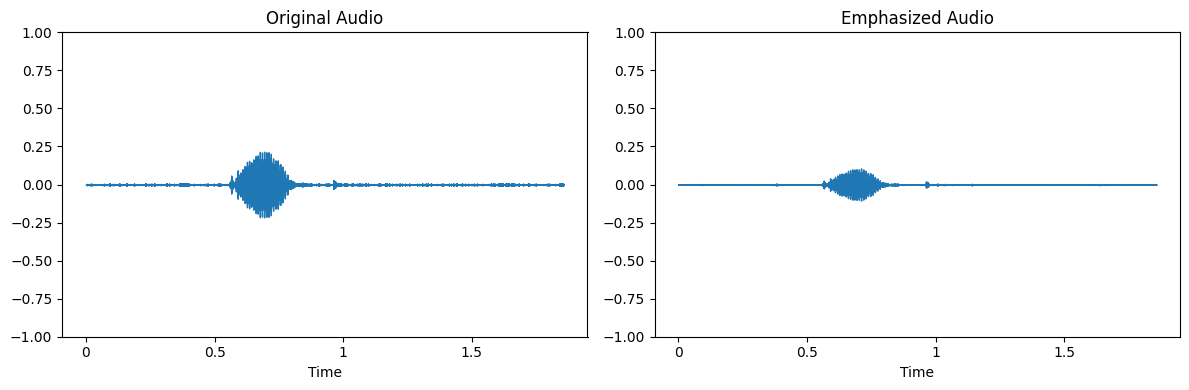

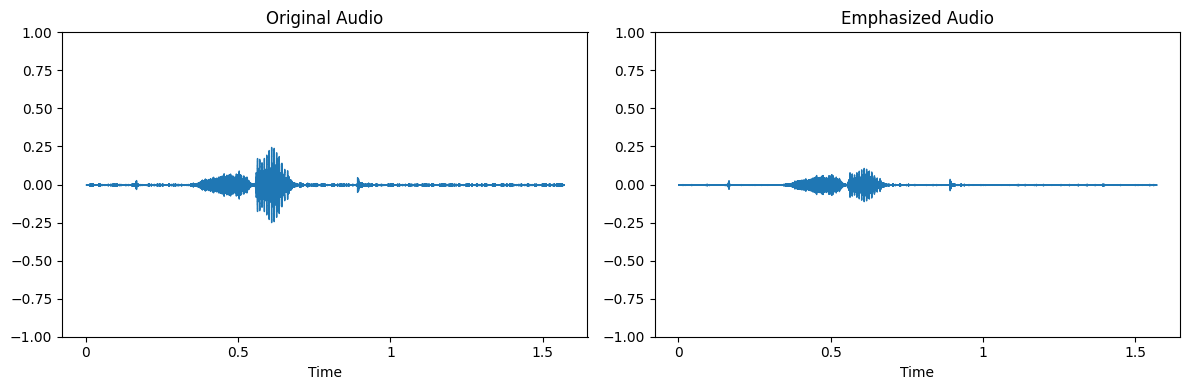

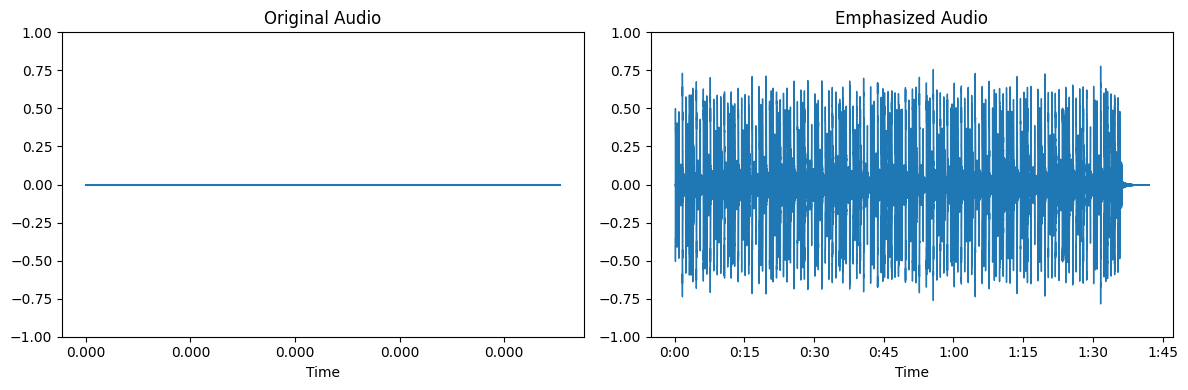

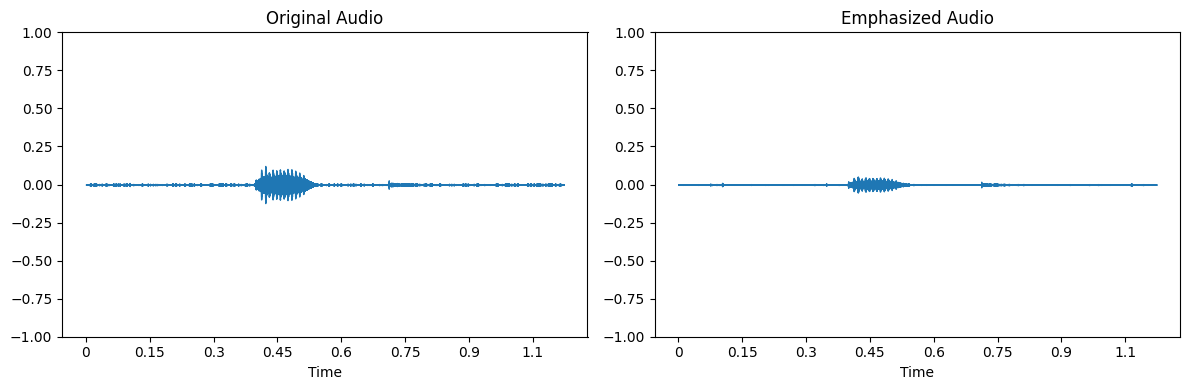

In [ ]:
# Audio Data Q3
def pre_emphasis(signal, alpha=0.6):
    emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return emphasized_signal

def ploting(file_path):
  audio_data, samplerate = sf.read(file_path)
  n_sig = pre_emphasis(audio_data)

  plt.figure(figsize=(12, 4))
    # Plot original signal
  plt.subplot(1, 2, 1)
  librosa.display.waveshow(audio_data, sr=samplerate)
  plt.title("Original Audio")
  plt.ylim([-1, 1])

    # Plot emphasized signal
  plt.subplot(1, 2, 2)
  librosa.display.waveshow(n_sig, sr= samplerate)
  plt.title("Emphasized Audio")
  plt.ylim([-1, 1])

  plt.tight_layout()
  plt.show()

# To use the function, simply call:
# plot_pre_emphasis('your_audio_file_path_here.wav')
# To visualize the original and emphasized audio of a file, simply call plot_pre_emphasis and pass the path of your audio file as an argument.


path = randlist(4)
for paths in path:
  ploting(paths)

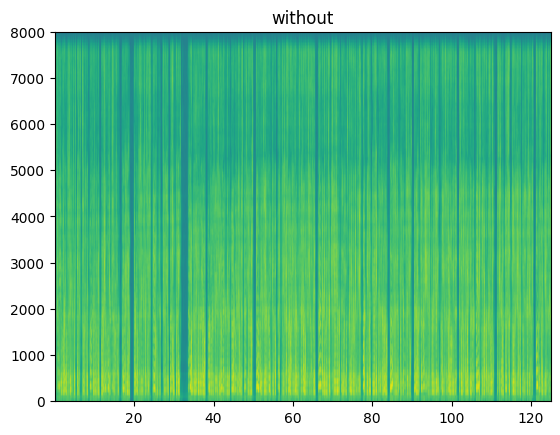

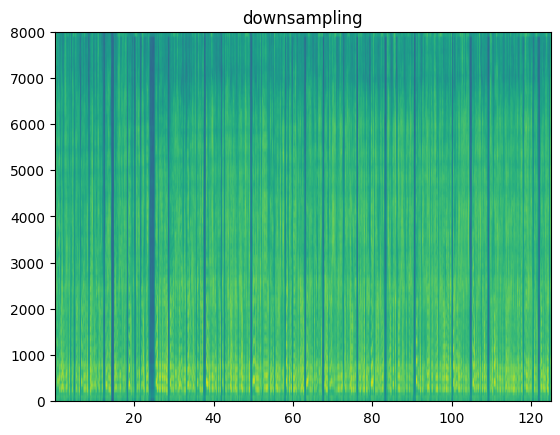

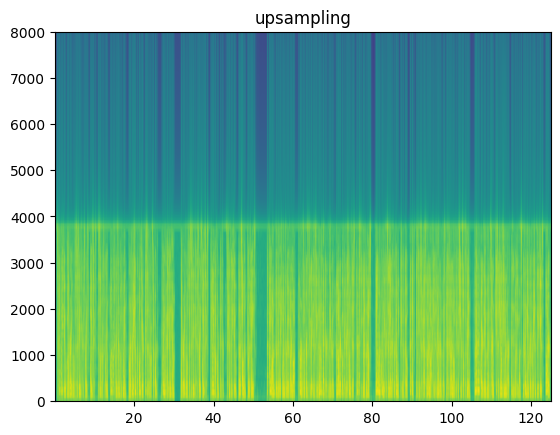

In [ ]:
# Audio Data Q4
import soundfile as sf
from scipy.signal import resample

aud_path = '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav'
audio_data, samplerate = sf.read(aud_path)
# print(samplerate)


Fs, aud = wavfile.read(aud_path)
# aud = aud[:-1]
first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.title("without")
plt.show()

# down
d_rate = 12000
new_sample = int(len(audio_data) * d_rate / samplerate)
audio_data = resample(audio_data, new_sample)

# Fs, aud = wavfile.read(aud_path)
# aud = aud[:-1]
first = audio_data[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.title("downsampling")
plt.show()

# upsamplning
d_rate = 34000
new_sample = int(len(audio_data) * d_rate / samplerate)
audio_data = resample(audio_data, new_sample)

# Fs, aud = wavfile.read(aud_path)
# aud = aud[:-1]
first = audio_data[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.title("upsampling")
plt.show()

In [ ]:
! pip install librosa

In [ ]:
! pip install pydub

['/content/AUDIO_DATA/AUDIO_DATA/CLASS 4/M08_B1_C16_M7.wav']
(35732,)
16000


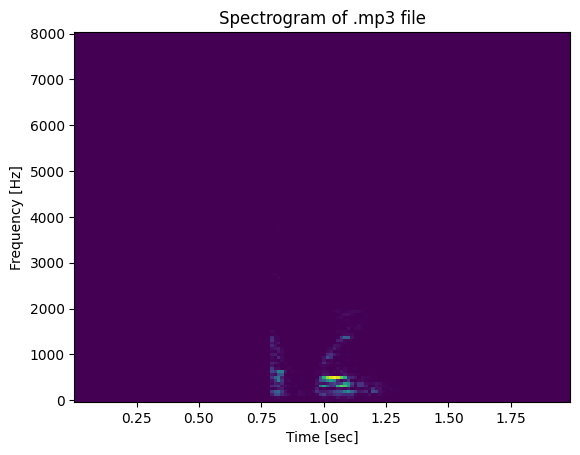

In [ ]:
# Audio Data Q5
import os
import pydub
import glob
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np


file = randlist(1)
print(file)

y, sr = sf.read(file[0])
print(y.shape)
print(sr)


wav_files = glob.glob('./*.wav')

for wav_file in wav_files:
    mp3_file = os.path.splitext(wav_file)[0] + '.mp3'
    sound = pydub.AudioSegment.from_wav(wav_file)

time_length = 2
time_samples = int(time_length * sr)
if len(y) < time_samples:
    ceil_limit = int(np.ceil(time_samples / len(y)))
    y = np.tile(y, ceil_limit)
start = rand.randint(0, len(y) - time_samples)
time = y[start:start + time_samples]

# .mp3
f, t, Sxx = signal.spectrogram(time, sr)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of .mp3 file')
plt.show()

# the graph gives an idea of the frequency distribution along the time axis and we can observe how the freequency varies as per diffrent audio file
# for further analysis we can look into MFCC (Mel Frequecy Cepstral Components ) of the audio data